# Building an ANN with the Iris Dataset
    
    ## Introduction
    Artificial Neural Networks (ANNs) are a cornerstone of modern machine learning. In this lab, you will construct a simple ANN to classify iris plants into one of three species based on the length and width of their sepals and petals. This exercise will help you understand the basics of neural networks, including their architecture, activation functions, and the backpropagation algorithm for training.

    ## Dataset Reference
    The Iris dataset was introduced by the British statistician and biologist Ronald Fisher in 1936. It is widely used as a beginner's dataset for machine learning classification problems. You can access this dataset via the `sklearn.datasets` module.
    

## Part 1: Load and Explore the Data
    ### Load the Dataset
    **Hint**: Use `sklearn.datasets.load_iris()` to load the Iris dataset into your environment.

    ### Explore the Data
    **Hint**: Use `pandas` to examine the first few rows of the dataset and `matplotlib` or `seaborn` to visualize the feature distributions.
    

In [90]:

from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout

# Load Iris
iris = load_iris()

In [64]:
#Convert data to DataFrame for easy handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [65]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Part 2: Prepare the Data
    ### Split the Data into Training and Test Sets
    **Hint**: Use `train_test_split` from `sklearn.model_selection` to divide the data into training and test sets.

    ### Scale the Features
    **Hint**: Standardize the features using `StandardScaler` from `sklearn.preprocessing`.
    

In [67]:
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part 3: Build the ANN Model
    ### Define the Model
    **Hint**: Use `keras` to define a sequential model. Start with a single hidden layer with a ReLU activation function.

    ### Compile the Model
    **Hint**: Compile your model specifying an optimizer and loss function appropriate for classification.
    

In [69]:
## Define the model
model = Sequential()

In [70]:
#Adding the input layer
model.add(Dense(units=6, activation='relu', input_shape=(X_train.shape[1],)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
#Adding the hidden layers
model.add(Dense(units=6, activation='relu'))

In [72]:
#Adding the output layer
model.add(Dense(units=3, activation='softmax'))

In [73]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [74]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

## Part 4: Train the Model
    ### Train the Model
    **Hint**: Fit the model on your training data with a reasonable number of epochs.

    ### Evaluate the Model
    **Hint**: Use the test data to evaluate your model and report the accuracy.
    

In [75]:
# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6672 - loss: 1.0141 - val_accuracy: 0.6667 - val_loss: 0.9242
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6359 - loss: 0.9536 - val_accuracy: 0.6667 - val_loss: 0.9013
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6435 - loss: 0.9258 - val_accuracy: 0.6667 - val_loss: 0.8796
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5594 - loss: 0.9870 - val_accuracy: 0.6667 - val_loss: 0.8575
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6408 - loss: 0.8990 - val_accuracy: 0.6667 - val_loss: 0.8361
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6514 - loss: 0.8591 - val_accuracy: 0.7083 - val_loss: 0.8154
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7121 - loss: 0.8018 - val_accuracy: 0.7083 - val_loss: 0.7957
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7428 - loss: 0.7620 - val_accuracy: 0.7500 - val_loss

In [76]:
# Evaluate the Model
model.evaluate(X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8667 - loss: 0.3351


[0.3351477384567261, 0.8666666746139526]

## Part 5: Experiment and Improve
    ### Tune the Model
    **Hint**: Try adding more hidden layers or neurons, or use different activation functions and see if the accuracy improves.

    ### Regularization and Dropout
    **Hint**: Implement dropout or regularization techniques to improve the model's generalization.
    

In [77]:
#adding more hidden layers or neurons

model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=3, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2014 - loss: 1.2493 - val_accuracy: 0.1667 - val_loss: 1.2013
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3063 - loss: 1.1584 - val_accuracy: 0.2083 - val_loss: 1.1382
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4129 - loss: 1.0933 - val_accuracy: 0.2917 - val_loss: 1.0837
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3825 - loss: 1.0154 - val_accuracy: 0.4167 - val_loss: 1.0360
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5558 - loss: 0.9194 - val_accuracy: 0.4583 - val_loss: 0.9953
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6815 - loss: 0.8714 - val_accuracy: 0.5833 - val_loss: 0.9589
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6370 - loss: 0.8369 - val_accuracy: 0.6667 - val_loss: 0.9267
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6649 - loss: 0.8051 - val_accuracy: 0.7083 - val_loss

In [80]:
# Evaluate the Model
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.1764


[0.17642147839069366, 1.0]

In [81]:
#Dropout
model = Sequential()
model.add(Dense(units=6, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  #  Dropout  50%
model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.5))  #  Dropout  50%
model.add(Dense(units=3, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [82]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3175 - loss: 1.2211 - val_accuracy: 0.5000 - val_loss: 0.9602
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4241 - loss: 1.0903 - val_accuracy: 0.5000 - val_loss: 0.9556
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4742 - loss: 1.1139 - val_accuracy: 0.5417 - val_loss: 0.9521
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3894 - loss: 1.0354 - val_accuracy: 0.5833 - val_loss: 0.9463
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4927 - loss: 1.0822 - val_accuracy: 0.5833 - val_loss: 0.9388
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3976 - loss: 1.0295 - val_accuracy: 0.6250 - val_loss: 0.9328
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5139 - loss: 1.0376 - val_accuracy: 0.6667 - val_loss: 0.9257
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3956 - loss: 1.0602 - val_accuracy: 0.7500 - val_loss

In [84]:
# Evaluate the Model
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9667 - loss: 0.6342


[0.6342459321022034, 0.9666666388511658]


## Part 4: Model Evaluation
### Evaluate the Model
To effectively evaluate your artificial neural network, consider the following metrics:
- **Accuracy**: This is the fraction of predictions our model got right.
- **Confusion Matrix**: A table used to describe the performance of a classification model on a set of test data for which the true values are known.
- **Precision, Recall, and F1-Score**: These metrics provide more insight into the types of errors made by the classifier.
**Hint**: Use `classification_report` and `confusion_matrix` from `sklearn.metrics` to calculate these metrics.

### Visualize Model Performance
Visualizing the learning curves (loss and accuracy over epochs) can provide insights into the training process, such as whether the model is fitting or overfitting.
**Hint**: Use `matplotlib.pyplot` to plot training and validation loss and accuracy.


In [91]:
# pred
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

#accuracy
accuracy=accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Accuracy: 0.9666666666666667


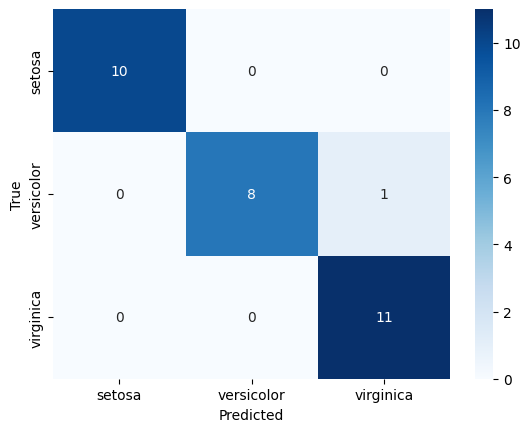

In [86]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [87]:
print(classification_report(y_test, y_pred_classes, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



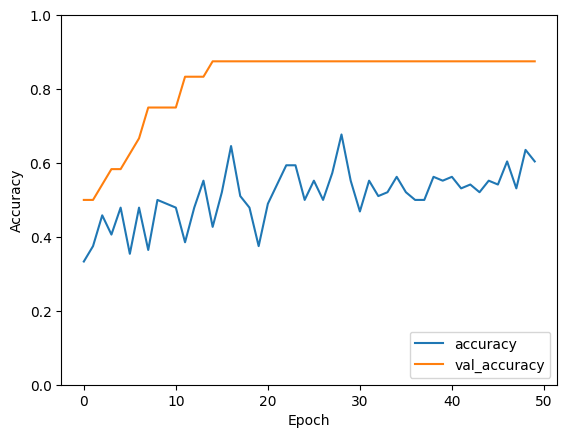

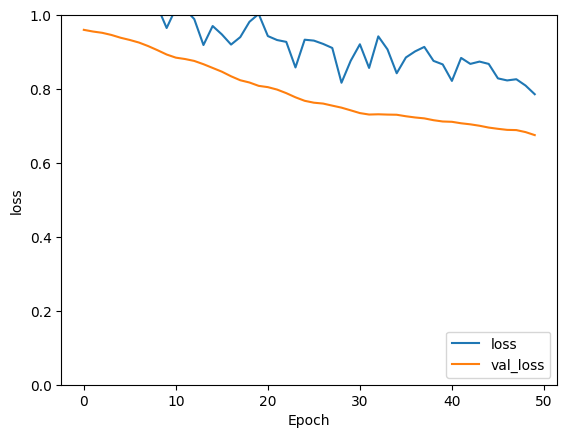

In [97]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Conclusion
    Summarize what the learner should have gained from this lab, including a better understanding of how ANNs work and how they can be applied to real-world classification problems.
    

when 1 train
 accuracy: 0.8667 - loss: 0.3351
 when i do first improv by add unit
 accuracy: 1.0000 - loss: 0.1764
  when i do second improv by add Dropout
   accuracy: 0.9667 - loss: 0.6342
   